In [2]:
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import re
from datetime import datetime

import os.path
from os import path
import time

# import sklearn
# import scipy

# from sklearn.naive_bayes import GaussianNB
# import lightgbm as lightgbm
# from xgboost import XGBClassifier
# import keras

# Get Started
# https://github.com/Refinitiv-API-Samples/Article.EikonDataAPI.DotNet.Library
# API limits
# https://developers.refinitiv.com/en/api-catalog/eikon/eikon-data-api/documentation?content=49692&type=documentation_item
import eikon as ek 

from pylab import rcParams
plt.rcParams['figure.figsize'] = 16, 8

In [3]:
fontsize_reg = 12
fontsize_title = 16
from pylab import rcParams
rcParams['figure.facecolor'] = '1'
rcParams['figure.figsize'] = [8.0, 3.5]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 600

rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'large'

In [4]:
# Зададим path для папки проекта и для папок файлов
path_project_folder = 'C:/DAN/t_systems/trade_project/'
folder_name_headlines = 'backup_headlines/'
folder_name_logger = 'logger/'

In [6]:
# зададим API ключ
ek.set_app_key('ccebd1ff788d4574818be93e35c4741925ac214e')

In [5]:
rics_german_df = pd.read_excel(path_project_folder + 'rics_german_excel.xlsx')
sort_cols = ['DAX', 'German_telecom', 'Company Market Cap']
rics_german_df = rics_german_df.sort_values(by=sort_cols, ascending=False) # .reset_index(drop=True)
rics_german_df.index = range(0, len(rics_german_df))
rics_german_df

,ric,Company Common Name,Country of Exchange,Primary Country of Risk,TRBC Industry Group Name,TRBC Industry Name,Price Close,Company Market Cap,DAX,German_telecom
0,DTEGn.DE,Deutsche Telekom AG,Germany,Germany,Telecommunications Services,Integrated Telecommunications Services,18.032030,8.580246e+10,1,1
1,SAPG.DE,SAP SE,Germany,Germany,Software & IT Services,Software,122.335901,1.501916e+11,1,0
2,SIEGn.DE,Siemens AG,Germany,Germany,Consumer Goods Conglomerates,Consumer Goods Conglomerates,139.347250,1.183675e+11,1,0
3,ALVG.DE,Allianz SE,Germany,Germany,Insurance,Multiline Insurance & Brokers,235.534278,9.704549e+10,1,0
4,VOWG_p.DE,Volkswagen AG,Germany,Germany,Automobiles & Auto Parts,Auto & Truck Manufacturers,182.653284,9.619011e+10,1,0
...,...,...,...,...,...,...,...,...,...,...
1486,IXM0392.DE,MSCI Pac ex Jap ETF,Germany,NaN,NaN,NaN,164.045417,NaN,0,0
1487,IXM0402.DE,MSCI Canada ETF,Germany,NaN,NaN,NaN,147.258410,NaN,0,0
1488,IXM0422.DE,MSCI USA ETF,Germany,NaN,NaN,NaN,368.704250,NaN,0,0
1489,IXM0432.DE,MSCI Jap ETF,Germany,NaN,NaN,NaN,179.058138,NaN,0,0


In [6]:
condition_german = rics_german_df['Country of Exchange'] == 'Germany'
condition_telecom = rics_german_df['TRBC Industry Group Name'] == 'Telecommunications Services'
rics_german_telekom_df = rics_german_df[condition_german & condition_telecom]
rics_german_telekom_df[['ric', 'Company Common Name', 'Company Market Cap', 'DAX', 'German_telecom']]

,ric,Company Common Name,Company Market Cap,DAX,German_telecom
0,DTEGn.DE,Deutsche Telekom AG,8.580246e+10,1,1
27,O2Dn.DE,Telefonica Deutschland Holding AG,8.088962e+09,0,1
28,UTDI.DE,United Internet AG,7.962405e+09,0,1
29,DRIG.DE,1&1 Drillisch AG,4.331541e+09,0,1
30,FNTGn.DE,freenet AG,2.614030e+09,0,1
31,TC1n.DE,Tele Columbus AG,3.688837e+08,0,1
32,NFN.DE,NFON AG,3.245050e+08,0,1
33,E4CG.DE,Ecotel Communication AG,3.558930e+07,0,1
34,PH6.F,Philion SE,2.065664e+05,0,1


In [7]:
condition_dax = (rics_german_df['DAX'] == 1) & (rics_german_df['German_telecom'] != 1)
rics_dax = rics_german_df[condition_dax]
rics_dax[['ric', 'Company Common Name', 'Company Market Cap', 'DAX', 'German_telecom']]

,ric,Company Common Name,Company Market Cap,DAX,German_telecom
1,SAPG.DE,SAP SE,1.501916e+11,1,0
2,SIEGn.DE,Siemens AG,1.183675e+11,1,0
3,ALVG.DE,Allianz SE,9.704549e+10,1,0
4,VOWG_p.DE,Volkswagen AG,9.619011e+10,1,0
5,DAIGn.DE,Daimler AG,7.532200e+10,1,0
6,BASFn.DE,BASF SE,7.222737e+10,1,0
7,ADSGn.DE,Adidas AG,7.062461e+10,1,0
8,DPWGn.DE,Deutsche Post AG,5.932596e+10,1,0
9,BMWG.DE,Bayerische Motoren Werke AG,5.780708e+10,1,0
10,BAYGn.DE,Bayer AG,5.621811e+10,1,0


In [8]:
rics_usa_df = pd.read_excel(path_project_folder + 'rics_usa_excel.xlsx')
print('fisrt top-200 companies by market cap:', '\n', list(rics_usa_df['Company Common Name'])[:100])

fisrt top-200 companies by market cap: 
 ['Apple Inc', 'Microsoft Corp', 'Amazon.com Inc', 'Alphabet Inc', 'Tesla Inc', 'Facebook Inc', 'Alibaba Group Holding Ltd', 'Berkshire Hathaway Inc', 'Visa Inc', 'Johnson & Johnson', 'Walmart Inc', 'JPMorgan Chase & Co', 'Mastercard Inc', 'UnitedHealth Group Inc', 'Procter & Gamble Co', 'NVIDIA Corp', 'Walt Disney Co', 'Home Depot Inc', 'PayPal Holdings Inc', 'Bank of America Corp', 'Ishares S&P 500', 'Verizon Communications Inc', 'Comcast Corp', 'Adobe Inc', 'Nike Inc', 'Netflix Inc', 'Pinduoduo Inc', 'Coca-Cola Co', 'Intel Corp', 'Merck & Co Inc', 'Vanguard Idx Fund', 'AT&T Inc', 'Pfizer Inc', 'Salesforce.Com Inc', 'Thermo Fisher Scientific Inc', 'PepsiCo Inc', 'Abbott Laboratories', 'Exxon Mobil Corp', 'Cisco Systems Inc', 'Abbvie Inc', 'Oracle Corp', 'Vanguard 500 Index Fund', 'Broadcom Inc', 'Qualcomm Inc', 'Chevron Corp', 'Accenture PLC', 'Danaher Corp', 'T-Mobile US Inc', 'Costco Wholesale Corp', 'Medtronic PLC', "Mcdonald's Corp", 'Eli L

In [9]:
def get_name_of_latest_file_in_folder(folder_name):
    files_creation_dates = pd.DataFrame(data = [], columns=[
        "folder_name", "file_name", "num_time", "str_time"
    ])

    files_creation_dates['file_name'] = os.listdir(folder_name)
    files_creation_dates['folder_name'] = folder_name
    files_creation_dates['file_folder_and_name'] = files_creation_dates['folder_name'] + files_creation_dates['file_name']
    files_creation_dates
    for i in range(0, len(files_creation_dates)):
        file_folder_and_name = files_creation_dates['file_folder_and_name'][i]
        files_creation_dates['num_time'][i] = os.path.getctime(file_folder_and_name)
        files_creation_dates['str_time'][i] = time.ctime(os.path.getctime(file_folder_and_name))

    most_latest_file_dir = files_creation_dates.sort_values(by=['num_time'], ascending=False)['file_folder_and_name'].iloc[0]
    
    return most_latest_file_dir

In [10]:
# Создадим df, в который будем сохранять вообще все новости.

# Можем создать пустой df, куда будем добавлять все новости
# all_headlines_df = pd.DataFrame(data = [], columns=["ric", "versionCreated", "headline", "storyId", "sourceCode", "story"])

# Но если мы уже сохраняли файл, достанем самый свежий из папки
most_latest_file = get_name_of_latest_file_in_folder(path_project_folder + folder_name_headlines)
all_headlines_df = pd.read_csv(most_latest_file, sep='~')
all_headlines_df['versionCreated'] = pd.to_datetime(all_headlines_df['versionCreated'])
print(all_headlines_df.shape, most_latest_file)

(112941, 6) C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2021-01-11_v1.csv


In [11]:
# Создадим подобие logger'а 

# quasi_logger = pd.DataFrame(data = [], columns=[
#     'ric_i', 'ric_now', 'headlines_slice_i', 'headlines_number',
#     'up_to_date_ric', 'story_i', 'story_id_now', 'story_is_success', 
#     'date_time',
# ])

# Так как у нас уже есть созданный logger, подгрузим его
most_latest_file = get_name_of_latest_file_in_folder(path_project_folder + folder_name_logger)
quasi_logger = pd.read_csv(most_latest_file, sep=';')
quasi_logger['date_time'] = pd.to_datetime(quasi_logger['date_time'])
print(quasi_logger.shape, most_latest_file)

(79359, 11) C:/DAN/t_systems/trade_project/logger/quasi_logger_2021-01-11_v1.csv


In [32]:
# Проверим, содержит ли all_headlines_df наш текущий ric
def set_value_of_up_to_date_ric(
        ric_now, # ric to check of existence in df
        df_with_news_to_check,
        column_name_with_rics = 'ric',
        column_name_with_dates = 'versionCreated'):
    """
    This function is checking the existance of ric in chosen df.
    If some news are in df, then function returns the oldest date in df.
    If no news are in df, then function returns 'None' for ek.get_news_headlines.
    """

    is_this_ric_in_all = ric_now in list(df_with_news_to_check[column_name_with_rics])
    print()
    print('is_this_ric_in_all:', is_this_ric_in_all, end=' ')
    if is_this_ric_in_all:
        # Если в нашем датасете присутствует этот ric,
        # то продолжаем по нему выгружать, берём мин имеющуюся дату.
        up_to_date_ric = str(df_with_news_to_check[df_with_news_to_check[column_name_with_rics] == ric_now][column_name_with_dates].min())
        print('  up_to_date_ric:', up_to_date_ric, end=' ')
    else:
        # None означает, что метод ek.get_news_headlines возьмёт текущий момент времени.
        up_to_date_ric = None
        print('  up_to_date_ric:', up_to_date_ric, end=' ')
        
    return up_to_date_ric

In [33]:
def get_news_headlines_with_some_tries(
        ric_now,
        headlines_count_to_request,
        up_to_date_ric,
        max_num_tries=5):
    """
    We trying to get df with headlines from eikon API with several tries
    """
    
    tries_num = 0
    while tries_num < max_num_tries:
        try:
            news_get_df = ek.get_news_headlines(
                query=ric_now,
                count=headlines_count_to_request,
                date_to=up_to_date_ric
            )
            print('got successfully', end=' ')
            break
        except Exception as e:
            print()
            print('Error when trying to get news headlines', tries_num)
            print(e)
            time.sleep(5)
            tries_num = tries_num + 1

    print('news_get_df.shape:', news_get_df.shape[0])

    return news_get_df

In [34]:
def prepare_headlines_df_to_adding_news_story(
        ric_now,
        news_get_df):
    """
    Now: news_get_df is collected df from ek.get_news_headlines method.
    And we want to add news story (full news text) to that df.
    So we should prepare that df for iterations with ek.get_news_story method.
    For that puspose we should add ric and story columns,
    and change the column name with headlines from text to headlines.
    """
    
    news_get_df = news_get_df.reset_index(drop=True) # чтобы юзать .loc()
    news_get_df['ric'] = ric_now
    news_get_df['story'] = np.nan
    news_get_df['headline'] = news_get_df['text']
    news_get_df = news_get_df.drop(columns=['text'])
    
    return news_get_df

In [35]:
def adding_news_stories_to_df_with_headlines(
        news_get_df,
        quasi_logger,
        ric_i,
        ric_now,
        headlines_slice_i,
        headlines_number,
        up_to_date_ric,
        col_name_with_story_id = 'storyId'):
    """
    The function adds full text news story to df with headlines using storyId.
    The function just prints the error in a case of error (they are rare).
    In any case the function logs results of API request to logger df.
    """

    for story_i in range(0, len(news_get_df)): # range(0, len(news_get_df))
        story_id_now = news_get_df['storyId'][story_i]

        try:
            story_now = ek.get_news_story(story_id_now)
            # Удалим из истории все тильды на всякий случай, будет sep='~'
            story_now = story_now.replace("~", "!tilda!")
            # Внесём выкаченную историю в df
            news_get_df.loc[story_i, 'story'] = story_now
            # Пометим, что мы успешно выкачали текст новости
            story_is_success = True
            print(story_i, end='; ')

        except Exception as e:
            story_is_success = False
            # Заменим NA на текст ошибки
            news_get_df.loc[story_i, 'story'] = 'error_when_trying_to_collect_story'
            # Выведем story с ошибкой
            print() # e.message
            print(
                'STORY IS OK:', story_is_success, 
                '  ric_now:', ric_now, # input to function
                '  ric_i:', ric_i, # input to function
                '  story_i:', story_i
                )
            print(e)
            time.sleep(5)

        finally:
            # В любом случае внесём в наш квази-логгер наблюдение story.
            quasi_logger = quasi_logger.append({
                "ric_i": ric_i, # input to function
                "ric_now": ric_now, # input to function
                "headlines_slice_i": headlines_slice_i, # input to function
                "headlines_number": headlines_number, # input to function
                "up_to_date_ric": up_to_date_ric, # input to function
                "story_i": story_i,
                "story_id_now": story_id_now,
                "story_is_success": story_is_success,
                "date_time": str(datetime.today())
            }, ignore_index = True)
    # At that moment the df has full text of news in col story
    return news_get_df, quasi_logger

In [36]:
def save_file_as_new_file_without_replacing(
        path_project_folder,
        folder_name_to_save,
        file_to_save,
        file_short_name_add_to_path):
    """
    Save the file to selected folder without replacing,
    but changing file name as a number of version at date now
    """
    # Сохраним версию all_headlines_df со всеми новостями
    # Подберём такое название, которого нет в dir, чтобы не переписывать файл.
    file_version = 1
    folder_name = path_project_folder + folder_name_to_save
    date_now = datetime.today().strftime("%Y-%m-%d")
    file_name = file_short_name_add_to_path + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    while file_name in os.listdir(folder_name):
        file_name = file_short_name_add_to_path + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
        file_version = file_version + 1
    # C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-24_v6.csv
    file_path = folder_name + file_name
    file_to_save.to_csv(file_path, sep = '~', index=False)
    print(file_path)

In [43]:
# Зададим, по какому df мы будет итерировать ric компании (её код на бирже).
rics_to_loop_df = rics_usa_df
rics_to_loop_df = rics_to_loop_df.reset_index(drop=True) # чтобы юзать .loc()

# Зададим переменную, котролирующую количество выгружаемых за раз заголовков
headlines_count_to_request = 100

# Необходимо задать переменную до цикла как 100, далее она будет изменяться
headlines_number = 100

# Первый цикл будет итерировать компании.
for ric_i in range(0, len(rics_to_loop_df)): # range(0, len(rics_to_loop_df))
    
    # Зададим переменную, которая скажет, какой сейчас итерируется ric.
    ric_now = rics_to_loop_df.loc[ric_i, "ric"]
    print(ric_i, ric_now)
    
    # Цикл, который прогоняет запросы заголовков.
    # Зададим для него параметр. Прибавим +1, если исчерпали новости.
    last_headlines_request = False
    # Будем вести счёт итерацию цикла While для выгрузки заголовков
    headlines_slice_i = 0
    # Для выкачивания заголовков нужно задать дату, до которой делаем запрос.
    # Если такого ric нет в all_headlines_df со всеми новостями,
    # то не будет задавать дату, до которой выкачивать заголовки.
    # Если такой ric есть в all_headlines_df со всеми новостями,
    # то возьмём минимальную дату из all_headlines_df со всеми новостями
    while not last_headlines_request:
        
        # That function returns the param for ek.get_news_headlines method
        # That param means the datetime slice of news to be collected
        up_to_date_ric = set_value_of_up_to_date_ric(
            ric_now=ric_now,
            df_with_news_to_check=all_headlines_df,
            column_name_with_rics='ric',
            column_name_with_dates='versionCreated'
        )
        
        # That function returns df with news headlines after several tries
        news_get_df = get_news_headlines_with_some_tries(
            max_num_tries=5,
            ric_now=ric_now,
            headlines_count_to_request=headlines_count_to_request,
            up_to_date_ric=up_to_date_ric
        )
        
        # Some df changes before adding full news text to that df
        news_get_df = prepare_headlines_df_to_adding_news_story(
            ric_now, news_get_df)
        
        # Adding full text of news (stories) to df with headlines
        news_get_df, quasi_logger = adding_news_stories_to_df_with_headlines(
            news_get_df,
            quasi_logger,
            ric_i,
            ric_now,
            headlines_slice_i,
            headlines_number,
            up_to_date_ric,
            col_name_with_story_id = 'storyId')
        
        # If at that moment news_get_df has less than 100 news,
        # than it means we have exhausted news for that ric because of dates limitation.
        # And we need to change ric_now that we iterate.
        headlines_number = news_get_df.shape[0]
        if headlines_number < 100:
            last_headlines_request = True
        
        headlines_slice_i = headlines_slice_i + 1
        
        # At that moment news_get_df has the slice with headlines & full-text.
        # Let's add that slice to all_headlines_df that has all news.
        all_headlines_df = all_headlines_df.append(news_get_df, ignore_index = True)
        print()
        print(str(datetime.today()), ric_now, 
              ' ric_i:', ric_i,
              ' headline_slice_i:', headlines_slice_i,
              ' headline_number:', headlines_number,
              ' not null:', news_get_df['story'].notna().sum(),
              up_to_date_ric)
        
        # End of headlines iterations for one selected ric
    
    # Save the version of all_headlines_df at every ric iteration
    save_file_as_new_file_without_replacing(
        path_project_folder=path_project_folder,
        folder_name_to_save=folder_name_headlines,
        file_to_save=all_headlines_df,
        file_short_name_add_to_path='all_headlines_df')
    
    # Save the version of quasi_logger at every ric iteration
    save_file_as_new_file_without_replacing(
        path_project_folder=path_project_folder,
        folder_name_to_save=folder_name_logger,
        file_to_save=quasi_logger,
        file_short_name_add_to_path='quasi_logger')

0 AAPL.OQ

is_this_ric_in_all: False   up_to_date_ric: None got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 02:22:47.093889 AAPL.OQ  ric_i: 0  headline_slice_i: 1  headline_number: 100  not null: 100 None

is_this_ric_in_all: True   up_to_date_ric: 2021-01-07 14:17:17.973000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73

2021-01-11 02:45:22,540 P[77476] [MainThread 77664] Backend error. 401 Unauthorized
2021-01-11 02:45:22,541 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 401 Unauthorized



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 19
'NoneType' object has no attribute 'replace'


2021-01-11 02:45:32,160 P[77476] [MainThread 77664] Backend error. 401 Unauthorized
2021-01-11 02:45:32,161 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 401 Unauthorized



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 20
'NoneType' object has no attribute 'replace'


2021-01-11 02:45:38,042 P[77476] [MainThread 77664] Backend error. 401 Unauthorized
2021-01-11 02:45:38,043 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 401 Unauthorized



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 21
'NoneType' object has no attribute 'replace'


2021-01-11 02:45:43,644 P[77476] [MainThread 77664] Backend error. 401 Unauthorized
2021-01-11 02:45:43,645 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 401 Unauthorized



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 22
'NoneType' object has no attribute 'replace'
23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 02:46:35.637953 AAPL.OQ  ric_i: 0  headline_slice_i: 26  headline_number: 100  not null: 100 2020-11-09 13:02:46.741000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-11-06 06:13:18.551000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84

2021-01-11 03:47:12,380 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:47:12,381 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 35
'NoneType' object has no attribute 'replace'
36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:47:45.620347 AAPL.OQ  ric_i: 0  headline_slice_i: 85  headline_number: 100  not null: 100 2020-07-23 12:10:48+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-21 17:58:26.320000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 

2021-01-11 03:48:52,755 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:48:52,756 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 82
'NoneType' object has no attribute 'replace'
83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:49:05.685855 AAPL.OQ  ric_i: 0  headline_slice_i: 86  headline_number: 100  not null: 100 2020-07-21 17:58:26.320000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-17 12:02:45.491000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:50:07.862525 AAPL.OQ  ric_i: 0  headline_slice_i: 87  headline_number: 100  not null: 100 2020-07-17 12:02:45.491000+00:00

is_this_ric_in_all: True   up_to_date_r

2021-01-11 03:50:28,450 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:50:28,451 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 33
'NoneType' object has no attribute 'replace'


2021-01-11 03:50:37,994 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:50:37,996 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 34
'NoneType' object has no attribute 'replace'
35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:51:28.596210 AAPL.OQ  ric_i: 0  headline_slice_i: 88  headline_number: 100  not null: 100 2020-07-16 03:15:15.554000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-15 12:04:21.009000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96

2021-01-11 03:53:01,455 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:53:01,456 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 50
'NoneType' object has no attribute 'replace'
51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:53:30.016435 AAPL.OQ  ric_i: 0  headline_slice_i: 90  headline_number: 100  not null: 100 2020-07-14 11:00:05.380000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-10 11:35:30.612000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:54:26.814459 AAPL.OQ  ric_i: 0  hea

2021-01-11 03:54:51,181 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:54:51,182 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 33
'NoneType' object has no attribute 'replace'
34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:55:28.166104 AAPL.OQ  ric_i: 0  headline_slice_i: 92  headline_number: 100  not null: 100 2020-07-08 13:21:49+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-06 07:13:23.843000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 

2021-01-11 03:56:21,434 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:56:21,435 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 89
'NoneType' object has no attribute 'replace'


2021-01-11 03:56:31,075 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 03:56:31,077 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 90
'NoneType' object has no attribute 'replace'
91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:56:45.136935 AAPL.OQ  ric_i: 0  headline_slice_i: 93  headline_number: 100  not null: 100 2020-07-06 07:13:23.843000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-07-01 18:22:13+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:57:41.447337 AAPL.OQ  ric_i: 0  headline_slice_i: 94  headline_number: 100  not null: 100 2020-07-01 18:22:13+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-06-26 21:33:58.565000+00:00 got succe

2021-01-11 03:58:22,225 P[77476] [MainThread 77664] Backend error. 503 Service Unavailable
2021-01-11 03:58:22,226 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 503 Service Unavailable



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 55
'NoneType' object has no attribute 'replace'
56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:58:54.710740 AAPL.OQ  ric_i: 0  headline_slice_i: 95  headline_number: 100  not null: 100 2020-06-26 21:33:58.565000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-06-24 09:03:25.920000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 03:59:50.966398 AAPL.OQ  ric_i: 0  headline_slice_i: 96  h

2021-01-11 04:00:42,184 P[77476] [MainThread 77664] Backend error. 404 Not Found
2021-01-11 04:00:42,185 P[77476] [MainThread 77664] HTTP request failed: EikonError-Backend error. 404 Not Found



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 95
'NoneType' object has no attribute 'replace'
96; 97; 98; 99; 
2021-01-11 04:00:49.154047 AAPL.OQ  ric_i: 0  headline_slice_i: 97  headline_number: 100  not null: 100 2020-06-23 09:59:52+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-06-22 19:43:58.030000+00:00 got successfully news_get_df.shape: 100
0; 1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65; 66; 67; 68; 69; 70; 71; 72; 73; 74; 75; 76; 77; 78; 79; 80; 81; 82; 83; 84; 85; 86; 87; 88; 89; 90; 91; 92; 93; 94; 95; 96; 97; 98; 99; 
2021-01-11 04:02:24.897994 AAPL.OQ  ric_i: 0  headline_slice_i: 98  headline_number: 100  not null: 100 2020-06-22 19:43:58.030000+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-06-22 06:02:23.533000+00:00 got successfully news_

2021-01-11 04:03:16,347 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71804 seconds.
2021-01-11 04:03:16,348 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71804 seconds.


got successfully news_get_df.shape: 100

STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 0
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:21,391 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71799 seconds.
2021-01-11 04:03:21,392 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71799 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 1
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:26,433 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71794 seconds.
2021-01-11 04:03:26,434 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71794 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 2
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:31,476 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71789 seconds.
2021-01-11 04:03:31,476 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71789 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 3
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:36,512 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71784 seconds.
2021-01-11 04:03:36,512 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71784 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 4
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:41,544 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71779 seconds.
2021-01-11 04:03:41,544 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71779 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 5
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:46,588 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71774 seconds.
2021-01-11 04:03:46,588 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71774 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 6
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:51,633 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71769 seconds.
2021-01-11 04:03:51,634 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71769 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 7
'NoneType' object has no attribute 'replace'


2021-01-11 04:03:56,663 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71764 seconds.
2021-01-11 04:03:56,663 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71764 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 8
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:01,704 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71759 seconds.
2021-01-11 04:04:01,705 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71759 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 9
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:06,749 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71754 seconds.
2021-01-11 04:04:06,750 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71754 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 10
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:11,781 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71749 seconds.
2021-01-11 04:04:11,782 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71749 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 11
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:16,811 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71744 seconds.
2021-01-11 04:04:16,812 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71744 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 12
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:21,850 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71739 seconds.
2021-01-11 04:04:21,851 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71739 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 13
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:26,891 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71734 seconds.
2021-01-11 04:04:26,892 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71734 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 14
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:31,932 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71729 seconds.
2021-01-11 04:04:31,933 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71729 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 15
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:36,975 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71724 seconds.
2021-01-11 04:04:36,975 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71724 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 16
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:42,015 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71718 seconds.
2021-01-11 04:04:42,015 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71718 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 17
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:47,056 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71713 seconds.
2021-01-11 04:04:47,057 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71713 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 18
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:52,090 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71708 seconds.
2021-01-11 04:04:52,091 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71708 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 19
'NoneType' object has no attribute 'replace'


2021-01-11 04:04:57,130 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71703 seconds.
2021-01-11 04:04:57,131 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71703 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 20
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:02,160 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71698 seconds.
2021-01-11 04:05:02,161 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71698 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 21
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:07,206 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71693 seconds.
2021-01-11 04:05:07,206 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71693 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 22
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:12,250 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71688 seconds.
2021-01-11 04:05:12,251 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71688 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 23
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:17,297 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71683 seconds.
2021-01-11 04:05:17,297 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71683 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 24
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:22,339 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71678 seconds.
2021-01-11 04:05:22,341 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71678 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 25
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:27,385 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71673 seconds.
2021-01-11 04:05:27,385 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71673 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 26
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:32,427 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71668 seconds.
2021-01-11 04:05:32,428 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71668 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 27
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:37,458 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71663 seconds.
2021-01-11 04:05:37,459 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71663 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 28
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:42,499 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71658 seconds.
2021-01-11 04:05:42,500 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71658 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 29
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:47,539 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71653 seconds.
2021-01-11 04:05:47,540 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71653 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 30
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:52,581 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71648 seconds.
2021-01-11 04:05:52,582 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71648 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 31
'NoneType' object has no attribute 'replace'


2021-01-11 04:05:57,624 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71643 seconds.
2021-01-11 04:05:57,625 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71643 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 32
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:02,663 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71638 seconds.
2021-01-11 04:06:02,664 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71638 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 33
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:07,707 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71633 seconds.
2021-01-11 04:06:07,709 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71633 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 34
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:12,741 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71628 seconds.
2021-01-11 04:06:12,742 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71628 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 35
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:17,784 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71623 seconds.
2021-01-11 04:06:17,785 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71623 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 36
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:22,816 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71618 seconds.
2021-01-11 04:06:22,817 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71618 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 37
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:27,852 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71613 seconds.
2021-01-11 04:06:27,852 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71613 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 38
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:32,885 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71608 seconds.
2021-01-11 04:06:32,886 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71608 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 39
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:37,916 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71603 seconds.
2021-01-11 04:06:37,917 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71603 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 40
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:42,959 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71598 seconds.
2021-01-11 04:06:42,960 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71598 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 41
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:47,993 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71593 seconds.
2021-01-11 04:06:47,993 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71593 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 42
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:53,024 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71587 seconds.
2021-01-11 04:06:53,025 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71587 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 43
'NoneType' object has no attribute 'replace'


2021-01-11 04:06:58,066 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71582 seconds.
2021-01-11 04:06:58,067 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71582 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 44
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:03,110 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71577 seconds.
2021-01-11 04:07:03,111 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71577 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 45
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:08,144 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71572 seconds.
2021-01-11 04:07:08,145 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71572 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 46
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:13,182 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71567 seconds.
2021-01-11 04:07:13,184 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71567 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 47
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:18,219 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71562 seconds.
2021-01-11 04:07:18,221 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71562 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 48
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:23,263 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71557 seconds.
2021-01-11 04:07:23,264 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71557 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 49
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:28,295 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71552 seconds.
2021-01-11 04:07:28,296 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71552 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 50
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:33,338 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71547 seconds.
2021-01-11 04:07:33,338 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71547 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 51
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:38,379 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71542 seconds.
2021-01-11 04:07:38,379 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71542 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 52
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:43,419 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71537 seconds.
2021-01-11 04:07:43,419 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71537 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 53
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:48,462 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71532 seconds.
2021-01-11 04:07:48,463 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71532 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 54
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:53,506 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71527 seconds.
2021-01-11 04:07:53,506 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71527 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 55
'NoneType' object has no attribute 'replace'


2021-01-11 04:07:58,549 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71522 seconds.
2021-01-11 04:07:58,549 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71522 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 56
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:03,591 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71517 seconds.
2021-01-11 04:08:03,593 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71517 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 57
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:08,623 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71512 seconds.
2021-01-11 04:08:08,624 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71512 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 58
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:13,657 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71507 seconds.
2021-01-11 04:08:13,658 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71507 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 59
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:18,691 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71502 seconds.
2021-01-11 04:08:18,692 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71502 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 60
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:23,724 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71497 seconds.
2021-01-11 04:08:23,724 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71497 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 61
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:28,759 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71492 seconds.
2021-01-11 04:08:28,761 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71492 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 62
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:33,804 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71487 seconds.
2021-01-11 04:08:33,805 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71487 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 63
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:38,838 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71482 seconds.
2021-01-11 04:08:38,838 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71482 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 64
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:43,881 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71477 seconds.
2021-01-11 04:08:43,882 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71477 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 65
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:48,926 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71472 seconds.
2021-01-11 04:08:48,927 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71472 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 66
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:53,959 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71467 seconds.
2021-01-11 04:08:53,960 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71467 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 67
'NoneType' object has no attribute 'replace'


2021-01-11 04:08:59,005 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71461 seconds.
2021-01-11 04:08:59,006 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71461 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 68
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:04,047 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71456 seconds.
2021-01-11 04:09:04,048 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71456 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 69
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:09,078 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71451 seconds.
2021-01-11 04:09:09,079 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71451 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 70
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:14,114 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71446 seconds.
2021-01-11 04:09:14,116 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71446 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 71
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:19,160 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71441 seconds.
2021-01-11 04:09:19,160 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71441 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 72
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:24,198 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71436 seconds.
2021-01-11 04:09:24,198 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71436 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 73
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:29,244 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71431 seconds.
2021-01-11 04:09:29,244 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71431 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 74
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:34,284 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71426 seconds.
2021-01-11 04:09:34,285 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71426 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 75
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:39,322 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71421 seconds.
2021-01-11 04:09:39,323 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71421 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 76
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:44,366 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71416 seconds.
2021-01-11 04:09:44,366 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71416 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 77
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:49,408 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71411 seconds.
2021-01-11 04:09:49,409 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71411 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 78
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:54,447 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71406 seconds.
2021-01-11 04:09:54,448 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71406 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 79
'NoneType' object has no attribute 'replace'


2021-01-11 04:09:59,487 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71401 seconds.
2021-01-11 04:09:59,488 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71401 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 80
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:04,521 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71396 seconds.
2021-01-11 04:10:04,521 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71396 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 81
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:09,564 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71391 seconds.
2021-01-11 04:10:09,565 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71391 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 82
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:14,602 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71386 seconds.
2021-01-11 04:10:14,603 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71386 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 83
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:19,645 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71381 seconds.
2021-01-11 04:10:19,645 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71381 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 84
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:24,684 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71376 seconds.
2021-01-11 04:10:24,684 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71376 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 85
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:29,727 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71371 seconds.
2021-01-11 04:10:29,728 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71371 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 86
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:34,768 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71366 seconds.
2021-01-11 04:10:34,769 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71366 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 87
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:39,798 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71361 seconds.
2021-01-11 04:10:39,799 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71361 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 88
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:44,831 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71356 seconds.
2021-01-11 04:10:44,831 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71356 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 89
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:49,866 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71351 seconds.
2021-01-11 04:10:49,867 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71351 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 90
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:54,902 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71346 seconds.
2021-01-11 04:10:54,902 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71346 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 91
'NoneType' object has no attribute 'replace'


2021-01-11 04:10:59,947 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71341 seconds.
2021-01-11 04:10:59,948 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71341 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 92
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:04,983 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71336 seconds.
2021-01-11 04:11:04,984 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71336 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 93
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:10,021 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71330 seconds.
2021-01-11 04:11:10,022 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71330 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 94
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:15,067 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71325 seconds.
2021-01-11 04:11:15,067 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71325 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 95
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:20,101 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71320 seconds.
2021-01-11 04:11:20,101 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71320 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 96
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:25,135 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71315 seconds.
2021-01-11 04:11:25,136 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71315 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 97
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:30,178 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71310 seconds.
2021-01-11 04:11:30,179 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71310 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 98
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:35,217 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71305 seconds.
2021-01-11 04:11:35,218 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71305 seconds.



STORY IS OK: False   ric_now: AAPL.OQ   ric_i: 0   story_i: 99
'NoneType' object has no attribute 'replace'


2021-01-11 04:11:40,299 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71300 seconds.
2021-01-11 04:11:40,299 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71300 seconds.



2021-01-11 04:11:40.265078 AAPL.OQ  ric_i: 0  headline_slice_i: 100  headline_number: 100  not null: 100 2020-06-19 16:51:29+00:00

is_this_ric_in_all: True   up_to_date_ric: 2020-06-18 06:36:19.353000+00:00 
Error when trying to get news headlines 0
'NoneType' object is not subscriptable


2021-01-11 04:11:45,325 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71295 seconds.
2021-01-11 04:11:45,326 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71295 seconds.



Error when trying to get news headlines 1
'NoneType' object is not subscriptable


2021-01-11 04:11:50,338 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71290 seconds.
2021-01-11 04:11:50,339 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71290 seconds.



Error when trying to get news headlines 2
'NoneType' object is not subscriptable


2021-01-11 04:11:55,352 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71285 seconds.
2021-01-11 04:11:55,353 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71285 seconds.



Error when trying to get news headlines 3
'NoneType' object is not subscriptable


2021-01-11 04:12:00,369 P[77476] [MainThread 77664] Error code 429 | Client Error: Too many requests, please try again later. Wait for 71280 seconds.
2021-01-11 04:12:00,369 P[77476] [MainThread 77664] HTTP request failed: EikonError-Client Error: Too many requests, please try again later. Wait for 71280 seconds.



Error when trying to get news headlines 4
'NoneType' object is not subscriptable


UnboundLocalError: local variable 'news_get_df' referenced before assignment

In [18]:
all_headlines_df

,ric,versionCreated,headline,storyId,sourceCode,story
0,DTEGn.DE,2020-12-23 18:25:27.865000+00:00,IGN Igen Networks joins T-Mobile partner program,urn:newsml:reuters.com:20201223:nNRAdspppv:1,NS:CNSWCH,"<div class=""storyContent"" lang=""en""><style typ..."
1,DTEGn.DE,2020-12-22 08:35:59.285000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF4Kt1L3:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
2,DTEGn.DE,2020-12-22 08:35:53.014000+00:00,(EN) Makedonski Telekom AD - Skopje Board Chan...,urn:newsml:reuters.com:20201222:nGLF2DBhZz:2,NS:GLFILE,"<div class=""storyContent"" lang=""en""><p><a href..."
3,DTEGn.DE,2020-12-21 13:08:03.993000+00:00,"WFB (Bus), Anyone? T-Mobile Turns Red Rose Tra...",urn:newsml:reuters.com:20201221:nBw3VPZ4Qa:1,NS:BSW,"<div class=""storyContent"" lang=""en""><style typ..."
4,DTEGn.DE,2020-12-19 09:00:00+00:00,HINTERGRUND-Internet überall dank Satellit und...,urn:newsml:reuters.com:20201219:nL8N2IY3D9:1,NS:RTRS,"<div class=""storyContent"" lang=""de""><style typ..."
...,...,...,...,...,...,...
112836,AAPL.OQ,2020-06-19 17:03:07+00:00,UPDATE 1-Apple to shut some U.S. stores again ...,urn:newsml:reuters.com:20200619:nL4N2DW39H:2,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112837,AAPL.OQ,2020-06-19 17:01:02+00:00,BRIEF-Apple Could Announce Plans As Soon As Mo...,urn:newsml:reuters.com:20200619:nFWN2DW05F:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112838,AAPL.OQ,2020-06-19 16:58:52.346000+00:00,APPLE COULD ANNOUNCE PLANS AS SOON AS MONDAY T...,urn:newsml:reuters.com:20200619:nFWN2DW05F:1,NS:RTRS,"<div class=""storyContent"" lang=""en""><style typ..."
112839,AAPL.OQ,2020-06-19 16:57:33+00:00,US GOVT-What went on so far? Apple news sinks ...,urn:newsml:reuters.com:20200619:nL1N2DW13R:1,NS:IFR,"<div class=""storyContent"" lang=""en""><style typ..."


<AxesSubplot:>

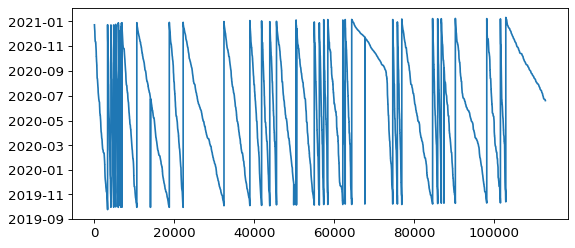

In [19]:
all_headlines_df['versionCreated'].plot()

In [20]:
quasi_logger

,ric_i,ric_now,headlines_slice_i,headlines_number,up_to_date_ric,story_i,story_id_now,story_is_success,date_time,date_only,exec_seconds
0,0,DTEGn.DE,0,100,2020-12-24T03:51:28,0,urn:newsml:reuters.com:20201223:nNRAdspppv:1,True,2020-12-24 03:51:31.939240,2020-12-24,NaN
1,0,DTEGn.DE,0,100,2020-12-24T03:51:28,1,urn:newsml:reuters.com:20201222:nGLF4Kt1L3:2,True,2020-12-24 03:51:33.740708,2020-12-24,1.801468
2,0,DTEGn.DE,0,100,2020-12-24T03:51:28,2,urn:newsml:reuters.com:20201222:nGLF2DBhZz:2,True,2020-12-24 03:51:37.079818,2020-12-24,3.339110
3,0,DTEGn.DE,0,100,2020-12-24T03:51:28,3,urn:newsml:reuters.com:20201221:nBw3VPZ4Qa:1,True,2020-12-24 03:51:37.803316,2020-12-24,0.723498
4,0,DTEGn.DE,0,100,2020-12-24T03:51:28,4,urn:newsml:reuters.com:20201219:nL8N2IY3D9:1,True,2020-12-24 03:51:38.957981,2020-12-24,1.154665
...,...,...,...,...,...,...,...,...,...,...,...
79354,0,AAPL.OQ,99,100,2020-06-19 16:51:29+00:00,95,urn:newsml:reuters.com:20200618:nNRAc3ivir:1,False,2021-01-11 04:11:20.074229,NaN,NaN
79355,0,AAPL.OQ,99,100,2020-06-19 16:51:29+00:00,96,urn:newsml:newsroom:20200618:nNRAc3ia9n:0,False,2021-01-11 04:11:25.107997,NaN,NaN
79356,0,AAPL.OQ,99,100,2020-06-19 16:51:29+00:00,97,urn:newsml:reuters.com:20200618:nNRAc3i37h:1,False,2021-01-11 04:11:30.151877,NaN,NaN
79357,0,AAPL.OQ,99,100,2020-06-19 16:51:29+00:00,98,urn:newsml:reuters.com:20200618:nNRAc3hz2d:1,False,2021-01-11 04:11:35.191055,NaN,NaN


In [21]:
# Сохранить версию all_headlines_df
file_version = 1
folder_name = path_project_folder + folder_name_headlines
date_now = datetime.today().strftime("%Y-%m-%d")
file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
while file_name in os.listdir(folder_name):
    file_name = 'all_headlines_df' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    file_version = file_version + 1
# C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2020-12-24_v6.csv
file_path = folder_name + file_name
all_headlines_df.to_csv(file_path, sep = '~', index=False)
print(file_path)

C:/DAN/t_systems/trade_project/backup_headlines/all_headlines_df_2021-01-11_v2.csv


In [22]:
# Сохранить версию логгера
file_version = 1
folder_name = path_project_folder + folder_name_logger
date_now = datetime.today().strftime("%Y-%m-%d")
file_name = 'quasi_logger' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
while file_name in os.listdir(folder_name):
    file_name = 'quasi_logger' + '_' + str(date_now) + '_v' + str(file_version) + '.csv'
    file_version = file_version + 1
file_path = folder_name + file_name
quasi_logger.to_csv(file_path, sep = ';', index=False)
print(file_path)

C:/DAN/t_systems/trade_project/logger/quasi_logger_2021-01-11_v2.csv


In [23]:
print('df shape:', all_headlines_df.shape, ',  Num of rics:', all_headlines_df.groupby('ric')['ric'].nunique().sort_values(ascending=False).count())
print('StoryId duplicated:', all_headlines_df['storyId'].duplicated().sum())
print('Rows in df duplicated:', all_headlines_df.duplicated().sum())
print()
print('status error_when_trying_to_collect_story:', all_headlines_df[all_headlines_df['story'] == 'error_when_trying_to_collect_story']['story'].count())
print()
print('    Number of NA:')
print(len(all_headlines_df) - all_headlines_df.notna().sum())

df shape: (112841, 6) ,  Num of rics: 36
StoryId duplicated: 13431
Rows in df duplicated: 1303

status error_when_trying_to_collect_story: 677

    Number of NA:
ric                 0
versionCreated      0
headline            0
storyId             0
sourceCode          0
story             153
dtype: int64


Median query time execution: 1.3986155


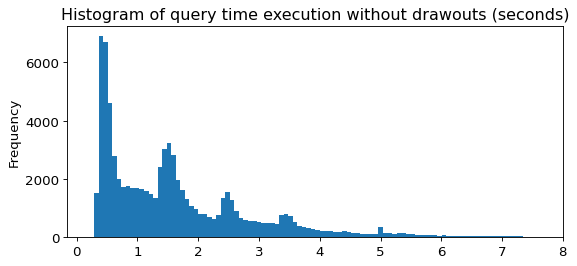

In [24]:
quasi_logger['date_time'] = pd.to_datetime(quasi_logger['date_time'])
quasi_logger['date_only'] = quasi_logger['date_time'].dt.date
quasi_logger['exec_seconds'] = quasi_logger['date_time'].diff() / np.timedelta64(1, 's')
exec_time_q99 = quasi_logger[quasi_logger['exec_seconds'] < quasi_logger['exec_seconds'].quantile(0.99)]
exec_time_q99['exec_seconds'].plot(kind='hist', bins = 100)
plt.title('Histogram of query time execution without drawouts (seconds)')
print('Median query time execution:', quasi_logger['exec_seconds'].median())

<AxesSubplot:ylabel='ric_now'>

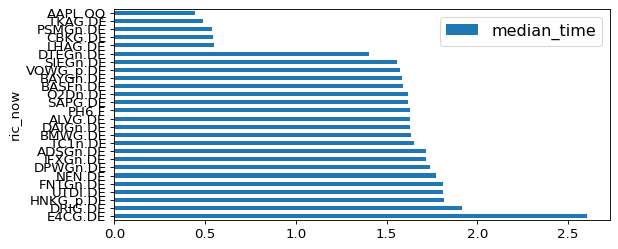

In [25]:
exec_time_q99.groupby(by='ric_now').agg(median_time=('exec_seconds', 'median')).sort_values(by='median_time', ascending=False).plot(kind='barh')

<AxesSubplot:ylabel='date_only'>

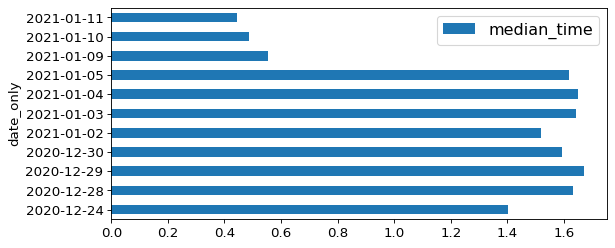

In [26]:
exec_time_q99.groupby(by='date_only').agg(median_time=('exec_seconds', 'median')).plot(kind='barh')